In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../../GaussianProcessBandits")

from gpbandits import *
from models.nn import *
from models.helpers import *

## Dataset Loading and Preprocessing

--------- Dataset --------
Trainset size:60000
Testset size:10000
Input (already flattened) shape: torch.Size([1, 784])
Original Input shape: (1,28,28)
Example input:
Label: 2


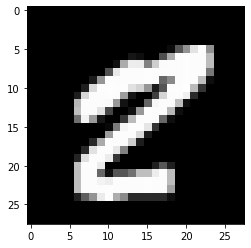

In [2]:
pre_process = torchvision.transforms.Compose([
                                  torchvision.transforms.ToTensor(),
                                  torchvision.transforms.Normalize(
                                      mean=(0.1307,),
                                      std=(0.3081,)),
                                  ReshapeTransform((-1,))])

mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=pre_process)
mnist_testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=pre_process)

batch_size = 1

print("--------- Dataset --------")
print("Trainset size:{}".format(len(mnist_trainset)))
print("Testset size:{}".format(len(mnist_testset)))

train_loader = torch.utils.data.DataLoader(mnist_trainset,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_testset,
                                          batch_size=4,
                                          shuffle=True)

data = Dataset(None, None, train_loader, test_loader, dataloader = True)

batch_idx, (example_data, example_targets) = next(enumerate(train_loader))
print("Input (already flattened) shape: {}".format(example_data.shape))
print("Original Input shape: (1,28,28)")

vis_example_data = example_data.reshape((batch_size,1,28,28))
vis_example_data = vis_example_data[0,:,:,:].permute(1, 2, 0)
print("Example input:")
print("Label: {}".format(example_targets[0]))
plt.figure()
plt.imshow(vis_example_data[:,:,0].numpy(), cmap='gray')
plt.show()

## Model Initialization

In [3]:
model = NeuralNet(input_dim = example_data.shape[1], num_classes = 10)

## Model Optimization

In [4]:
best_model = gpbandits(model, data, iters=2, kernel='se', cl=0.1, v=0.1, verbose=False, best_model_log=False)

Model. Num hid layers: 2, Num hid units: 64, Activation: ReLU(), Drop Prob: 0.1
Training...
Epoch 1, Training loss: 2.291
Epoch 2, Training loss: 2.311
Testing...
Test Loss: 2.306777238845825
Model. Num hid layers: 1, Num hid units: 58, Activation: ReLU(), Drop Prob: 0.952047262211741
Training...
Epoch 1, Training loss: 2.302
Epoch 2, Training loss: 2.302
Testing...
Test Loss: 2.299034595489502
Model. Num hid layers: 0, Num hid units: 44, Activation: Tanh(), Drop Prob: 0.23855388396952293
Training...
Epoch 1, Training loss: 2.330
Epoch 2, Training loss: 2.308
Testing...
Test Loss: 2.295924663543701


In [6]:
best_model.print()

Model. Num hid layers: 0, Num hid units: 44, Activation: Tanh(), Drop Prob: 0.23855388396952293
